<img src="https://www.unir.net/wp-content/uploads/2019/11/Unir_2021_logo.svg" width="240" height="240" align="right"/>

<center><h1>Técnicas de Inteligencia Artificial</header1></center>
<left><h1>Actividad 2. Trabajando con redes neuronales y Deep Learning</header1></left>

Presentado por: Samy Alexander Rodríguez Martínez  <br>
Fecha: 19/01/2025

# Importación de librerias necesarias

# Parte II. Clasificación

In [ ]:
#Para esta actividad se importarán las siguientes librerías:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Cargar el Dataset

Con al menos 1000 instancias, una variable/atributo de la salida, y que dependa de, al menos, 6 variables/atributos de entrada.

In [ ]:
#Código para cargar el Dataset
url = 'https://raw.githubusercontent.com/Samyr0116/Actividad_2_Clasificacion/refs/heads/main/letter-recognition.csv'
df = pd.read_csv(url)
df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


## Descripción de la fuente del Dataset

Haga una descripción de la fuente de dayos utilizada (Incluya los enlaces necesarios).

**Descripción de la fuente del Dataset**  
El conjunto de datos utilizado en este análisis es el **Letter ecognition**, disponible en la [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Letter+Recognition). Este dataset fue creado con el objetivo de identificar cada una de un gran número de imágenes en blanco y negro de letras mayúsculas (A-Z). Para ello, se tomaron letras escritas en 20 fuentes distintas, a las cuales se aplicaron distorsiones aleatorias, generando así 20,000 observaciones únicas. Luego, cada imagen fue convertida a 16 atributos numéricos (por ejemplo, momentos estadísticos y conteos de bordes) y escalada a valores enteros entre 0 y 15.  

A partir de estos 16 atributos, se busca **predecir la letra del alfabeto (A-Z)** que corresponde a cada imagen. El reconocimiento automático de caracteres es un problema clásico en el campo de la Visión por Computador y el Procesamiento de Imágenes. La automatización de esta tarea tiene múltiples aplicaciones, como la lectura de matrículas de autos, clasificación de documentos escaneados, digitalización de textos, entre otros.

## Explique el problema a resolver.
Descripción del problema. Tipo de problema (justifique). Variable objetivo, variables de entrada. Utilidad de su posible solución. Elementos adicionales que considere relevantes (no son necesarios contenidos teóricos, sino explicar qué relaciones tratas de comprobar y con qué métodos).

**Descripción del problema**: El objetivo es clasificar cada observación en alguna de las 26 posibles clases (A-Z) utilizando los 16 atributos disponibles.  

**Tipo de problema**: Se trata de un problema de Aprendizaje Supervisado de tipo Clasificación Multiclase, ya que la variable objetivo es categórica con 26 posibles valores.  

**Variable objetivo**:  
- letter  

**Variables de entrada**:  
- xbox  
- ybox  
- width  
- height  
- onpix  
- xbar  
- ybar  
- x2bar  
- y2bar  
- xybar  
- x2ybar  
- xy2bar  
- xedge  
- xedgey  
- yedge  
- yedgex  

**Utilidad de la solución**:  
- **Automatización de la lectura de caracteres**: Permite desarrollar sistemas que reconozcan letras impresas en diferentes fuentes y bajo distorsiones, útil en escaneo de documentos e identificación automatizada.  
- **Optimización de procesos**: Contribuye a tareas de digitalización y clasificación masiva de textos, reduciendo esfuerzos manuales y errores humanos.  
- **Aplicaciones en Visión por Computador**: Sirve como base para proyectos más complejos de reconocimiento óptico de caracteres (OCR), donde los algoritmos pueden ampliarse a la lectura de palabras y frases completas.  
- **Desarrollo de modelos portables**: Los modelos entrenados podrían implementarse en dispositivos o plataformas con recursos computacionales limitados (p. ej., escáneres portátiles).  

**Elementos adicionales**:  
- **Relaciones a comprobar**:  
  - Cómo la posición y el tamaño de la caja delimitadora (xbox, ybox, width, height) afectan la precisión en el reconocimiento de la letra.  
  - Cuáles son los atributos estadísticos (xbar, ybar, x2bar, y2bar) más relevantes para distinguir letras con morfologías similares.  
  - Influencia del conteo de píxeles activados (onpix) y el conteo de bordes (xedge, yedge) en la discriminación de letras que comparten trazos parecidos (p. ej., B y D, O y Q).  

**Métodos a utilizar**:  
- **Exploración de Datos (EDA)**: Análisis estadístico y visual para entender la distribución de los atributos, correlaciones y posibles sesgos en el dataset.  
- **Preprocesamiento**: Aunque los datos ya vienen en valores enteros de 0 a 15, podría considerarse normalizar o estandarizar para ciertos algoritmos, además de identificar o gestionar valores atípicos si los hubiera.  
- **Modelado Predictivo**: Entrenar algoritmos de clasificación (p. ej. Regresión Logística Multiclase, Random Forest Classifier, Redes Neuronales) para predecir la letra.  
- **Evaluación**: Emplear métricas de clasificación (Exactitud, Precisión, Recall, F1-score, Matriz de Confusión) para comparar diferentes modelos y seleccionar el más efectivo.  

## Caracterización del Dataset

Realice una descripción de los datos con:

>- Número de instancias en total.
>- Número de atributos de entrada, su significado y tipo.
>- Número de clases de la variable objetivo, indicando que representan dichas clases y el tipo de valor que toman.
>- Número de instancias pertenecientes a cada clase en la variable objetivo.
>- Estadísticas de la variable objetivo.
>- Estadísticas los atributos en relación con la variable objetivo.

Se incorporá una pequeña descripción (EDA) del conjunto de datos utilizado. Se analiza el dataset proporcionando, se muestra al menos algunas de sus características mediante tablas y al menos algunas de ellas en modo gráfico (p.ej., histogramas, diagramas de dispersión, diagramas de cajas y bigotes, etc.)


In [ ]:
# Número de instancias en total.
num_instancias = len(df)
print("Número de instancias en total:", num_instancias)

Número de instancias en total: 20000


In [ ]:
# Número de atributos de entrada
atributos = df.drop(columns='letter').columns
print(f"Número de atributos de entrada: {len(atributos)}")

Número de atributos de entrada: 16


**Significado de los atributos de entrada:**
- **xbox:** Posición horizontal del cuadro.  
- **ybox:** Posición vertical del cuadro.  
- **width:** Ancho del cuadro.  
- **height:** Altura del cuadro.  
- **onpix:** Número total de píxeles activos.  
- **xbar:** Media de x de píxeles activos en el cuadro.  
- **ybar:** Media de y de píxeles activos en el cuadro.  
- **x2bar:** Varianza de x media.  
- **y2bar:** Varianza de y media.  
- **xybar:** Correlación xy media.  
- **x2ybar:** Media de (x^2)(y).  
- **xy2bar:** Media de (x)(y^2).  
- **xedge:** Conteo promedio de bordes de izquierda a derecha.  
- **xedgey:** Correlación de xedge con y.  
- **yedge:** Conteo promedio de bordes de abajo hacia arriba.  
- **yedgex:** Correlación de yedge con x.

In [ ]:
# Tipo de datos de los atributos
print(f"Tipo de datos de los atributos:\n{df.dtypes}")

Tipo de datos de los atributos:
letter    object
xbox       int64
ybox       int64
width      int64
height     int64
onpix      int64
xbar       int64
ybar       int64
x2bar      int64
y2bar      int64
xybar      int64
x2ybar     int64
xy2bar     int64
xedge      int64
xedgey     int64
yedge      int64
yedgex     int64
dtype: object


In [ ]:
# Número de clases de la variable objetivo, indicando que representan dichas clases y el tipo de valor que toman.
num_clases = df['letter'].nunique()
print(f"Número de clases de la variable objetivo: {num_clases}")
print(f"Tipo de valor que toma: {df['letter'].dtypes}")

Número de clases de la variable objetivo: 26
Tipo de valor que toma: object


Cada clase representa una letra mayúscula del alfabeto inglés, que consta de 26 letras. Por lo tanto, hay 26 posibles valores (de la A a la Z).

In [ ]:
# Número de instancias pertenecientes a cada clase en la variable objetivo.
instancias_por_clase = df['letter'].value_counts()
print(f"Número de instancias por clase:\n{instancias_por_clase}")

Número de instancias por clase:
letter
U    813
D    805
P    803
T    796
M    792
A    789
X    787
Y    786
N    783
Q    783
F    775
G    773
E    768
B    766
V    764
L    761
R    758
I    755
O    753
W    752
S    748
J    747
K    739
C    736
H    734
Z    734
Name: count, dtype: int64


In [ ]:
# Verificar valores nulos.
print(f"Valores nulos:\n{df.isnull().sum()}")

Valores nulos:
letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64


In [ ]:
# Estadísticas de la variable objetivo.
df['letter'].describe()

,letter
count,20000
unique,26
top,U
freq,813


In [ ]:
# Estadísticas de los atributos en relación con la variable objetivo.
df.groupby('letter').describe()

xbox                                                 ybox             \
        count      mean       std  min  25%  50%  75%   max  count      mean   
letter                                                                         
A       789.0  3.337136  1.519886  1.0  2.0  3.0  4.0  10.0  789.0  6.975919   
B       766.0  3.985640  1.829619  0.0  3.0  4.0  5.0  11.0  766.0  6.962141   
C       736.0  4.031250  1.790482  0.0  3.0  4.0  5.0  10.0  736.0  7.063859   
D       805.0  4.023602  1.681237  1.0  3.0  4.0  5.0  10.0  805.0  7.244720   
E       768.0  3.727865  1.544694  0.0  3.0  4.0  5.0  10.0  768.0  6.944010   
F       775.0  3.832258  1.678329  0.0  3.0  4.0  5.0  10.0  775.0  7.009032   
G       773.0  4.086675  1.700043  1.0  3.0  4.0  5.0  10.0  773.0  6.988357   
H       734.0  4.331063  1.882841  1.0  3.0  4.0  5.0  12.0  734.0  6.844687   
I       755.0  2.270199  1.858695  0.0  1.0  2.0  3.0   9.0  755.0  6.980132   
J       747.0  2.970549  1.683126  0.0  2.0  3.0  4.0   9.0  747.0  6.799197   
K       739.0  4.510149  1.915800  0.0  3.0  4.0  6.0  12.0  739.0  7.320704   
L       761.0  3.417871  1.575769  0.0  2.0  3.0  4.0  10.0  761.0  7.128778   
M       792.0  4.895202  2.096985  1.0  4.0  5.0  6.0  15.0  792.0  6.954545   
N       783.0  4.508301  2.041042  1.0  3.0  4.0  6.0  11.0  783.0  7.173691   
O       753.0  4.114210  1.729814  1.0  3.0  4.0  5.0  10.0  753.0  7.124834   
P       803.0  4.268991  2.016113  0.0  3.0  4.0  5.0  12.0  803.0  7.219178   
Q       783.0  4.043423  1.725587  1.0  3.0  4.0  5.0  10.0  783.0  6.404853   
R       758.0  4.069921  1.801692  1.0  3.0  4.0  5.0  13.0  758.0  7.042216   
S       748.0  4.101604  1.719359  1.0  3.0  4.0  5.0  10.0  748.0  7.441176   
T       796.0  3.996231  1.857498  0.0  3.0  4.0  5.0  10.0  796.0  7.125628   
U       813.0  4.581796  1.943731  1.0  3.0  4.0  6.0  12.0  813.0  7.070111   
V       764.0  4.270942  1.975245  1.0  3.0  4.0  5.0  11.0  764.0  7.324607   
W       752.0  5.168883  2.173424  1.0  4.0  5.0  6.0  13.0  752.0  7.156915   
X       787.0  4.069886  1.786704  0.0  3.0  4.0  5.0  11.0  787.0  7.149936   
Y       786.0  4.181934  2.055592  0.0  3.0  4.0  6.0  10.0  786.0  6.706107   
Z       734.0  3.737057  1.762986  1.0  2.0  4.0  5.0  10.0  734.0  6.764305   

        ... yedge        yedgex                                            \
        ...    75%   max  count      mean       std  min  25%   50%   75%   
letter  ...                                                                 
A       ...    3.0  11.0  789.0  7.468948  1.488743  1.0  7.0   8.0   8.0   
B       ...    8.0  12.0  766.0  9.100522  1.289099  3.0  9.0   9.0  10.0   
C       ...    4.0  10.0  736.0  8.555707  1.357126  4.0  7.0   9.0  10.0   
D       ...    4.0  12.0  805.0  7.628571  1.353980  3.0  7.0   8.0   8.0   
E       ...    7.0  11.0  768.0  8.506510  1.545472  3.0  8.0   8.5  10.0   
F       ...    4.0  11.0  775.0  6.712258  1.478893  2.0  6.0   6.0   7.0   
G       ...    6.0  10.0  773.0  9.216041  1.358585  6.0  8.0   9.0  10.0   
H       ...    4.0  11.0  734.0  7.858311  1.063640  4.0  7.0   8.0   8.0   
I       ...    3.0  11.0  755.0  7.931126  0.959677  2.0  8.0   8.0   8.0   
J       ...    2.0  11.0  747.0  7.416332  1.214038  3.0  7.0   7.0   8.0   
K       ...    5.0  10.0  739.0  8.818674  1.875423  3.0  7.0   9.0  10.0   
L       ...    3.0  10.0  761.0  7.651774  1.497682  4.0  6.0   8.0   8.0   
M       ...    3.0  10.0  792.0  7.518939  1.226404  2.0  7.0   8.0   8.0   
N       ...    2.0  10.0  783.0  7.043423  1.266590  0.0  7.0   7.0   8.0   
O       ...    4.0   9.0  753.0  7.872510  0.904893  4.0  8.0   8.0   8.0   
P       ...    4.0   8.0  803.0  7.704857  1.088967  4.0  7.0   8.0   8.0   
Q       ...    6.0  10.0  783.0  8.945083  1.516591  5.0  8.0   9.0  10.0   
R       ...    6.0  10.0  758.0  9.470976  1.723588  4.0  8.0  10.0  11.0   
S       ...    9.0  15.0  748.0  7.871658  1.771286  0.0  8.0   8.0   

In [ ]:
# Estadisticas de los datos.
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
xbox,20000.0,4.02355,1.913212,0.0,3.0,4.0,5.0,15.0
ybox,20000.0,7.03550,3.304555,0.0,5.0,7.0,9.0,15.0
width,20000.0,5.12185,2.014573,0.0,4.0,5.0,6.0,15.0
height,20000.0,5.37245,2.261390,0.0,4.0,6.0,7.0,15.0
onpix,20000.0,3.50585,2.190458,0.0,2.0,3.0,5.0,15.0
xbar,20000.0,6.89760,2.026035,0.0,6.0,7.0,8.0,15.0
ybar,20000.0,7.50045,2.325354,0.0,6.0,7.0,9.0,15.0
x2bar,20000.0,4.62860,2.699968,0.0,3.0,4.0,6.0,15.0
y2bar,20000.0,5.17865,2.380823,0.0,4.0,5.0,7.0,15.0
xybar,20000.0,8.28205,2.488475,0.0,7.0,8.0,10.0,15.0


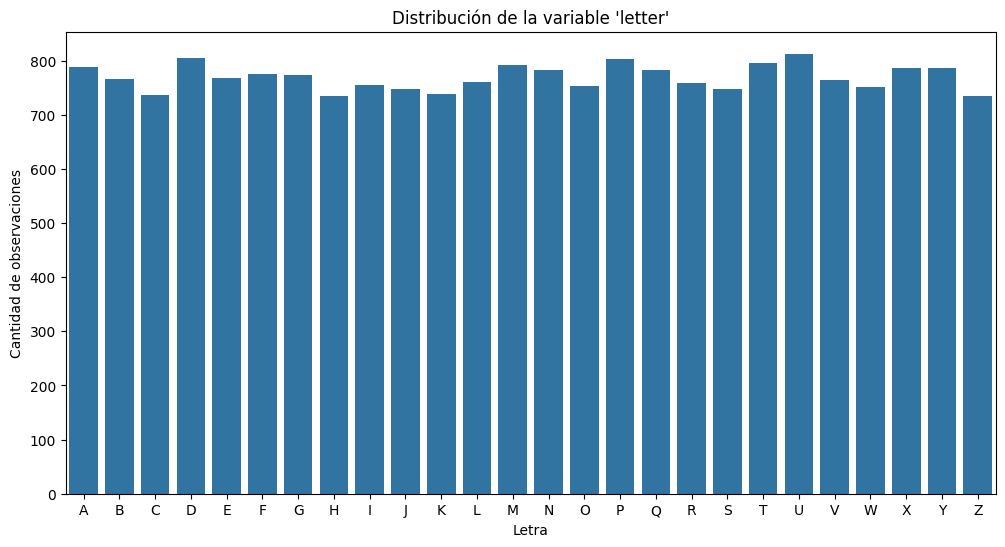

In [ ]:
# Gráfico de barras de la variable "letter"

# Ordenar alfabéticamente:
order_alphabetic = sorted(df["letter"].unique())

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='letter',order=order_alphabetic)
plt.title("Distribución de la variable 'letter'")
plt.xlabel("Letra")
plt.ylabel("Cantidad de observaciones")
plt.show()

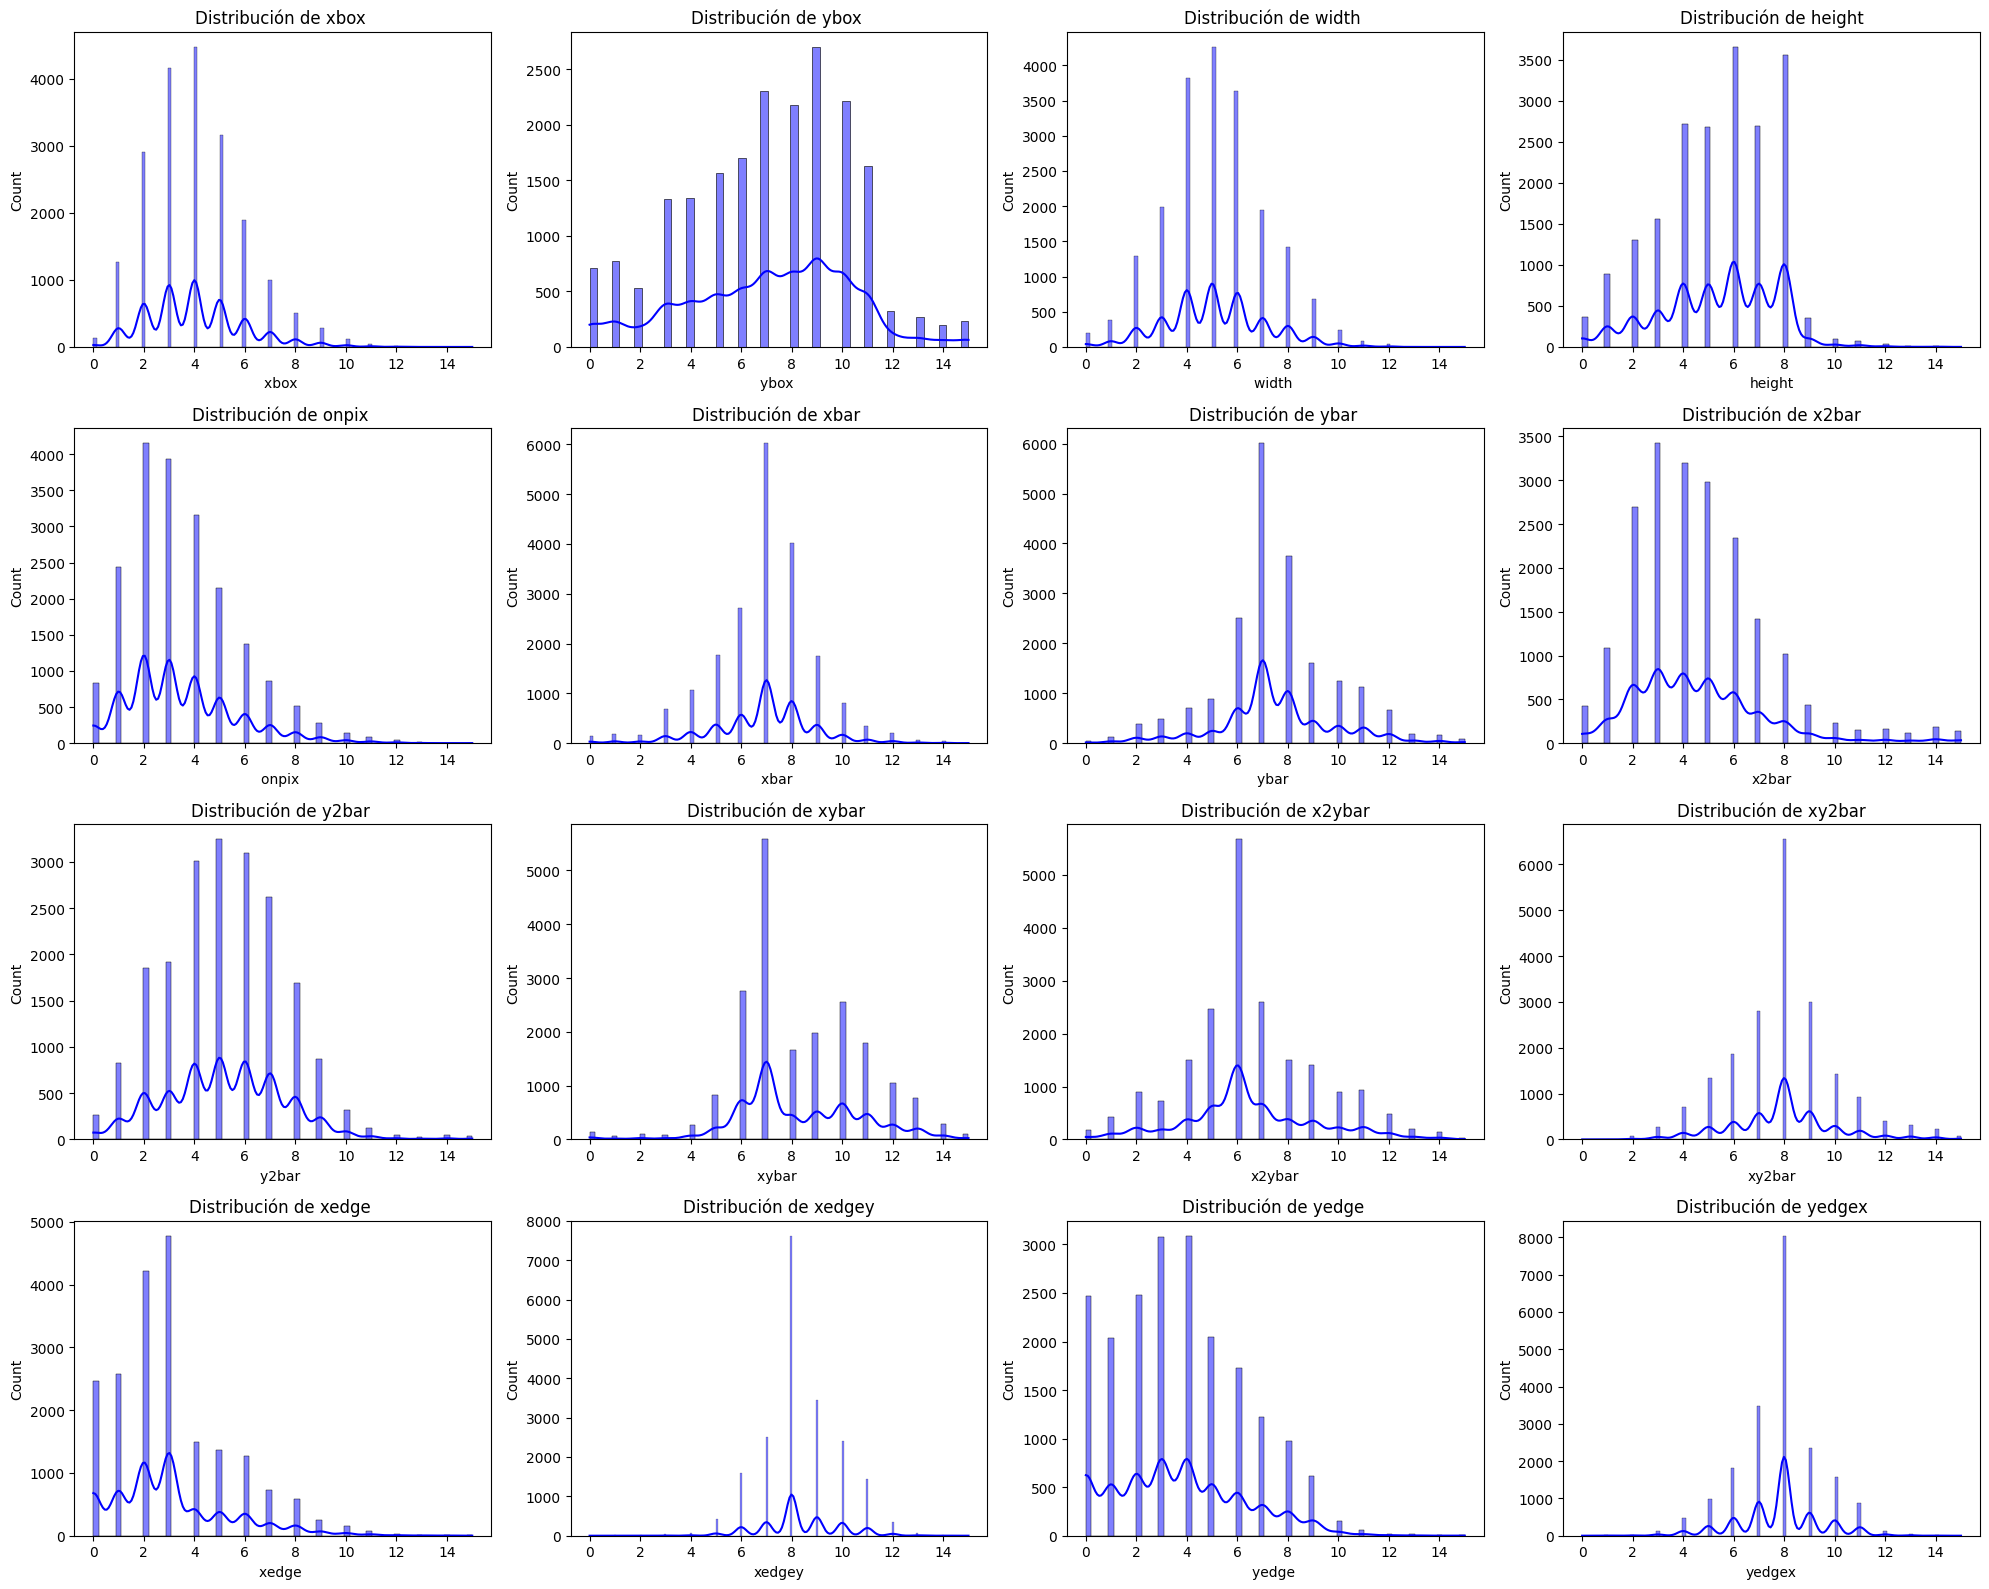

In [ ]:
# Visualizar la distribución de los atributos a partir de 'xbox'.
atributos_numericos = df.columns[1:]
num_atributos = len(atributos_numericos)

# Definimos las dimensiones de la rejilla de subplots (4x4), porque hay 16 atributos.
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 16))

# Aplanamos la matriz de ejes para iterar fácilmente la lista de columnas
axes = axes.ravel()

# Recorremos cada atributo y dibujamos su histograma con línea de densidad (kde)
for i, col in enumerate(atributos_numericos):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i], color="blue")
    axes[i].set_title(f"Distribución de {col}")

# Ajustar el espacio entre subplots para evitar solapamientos
plt.tight_layout()
plt.show()

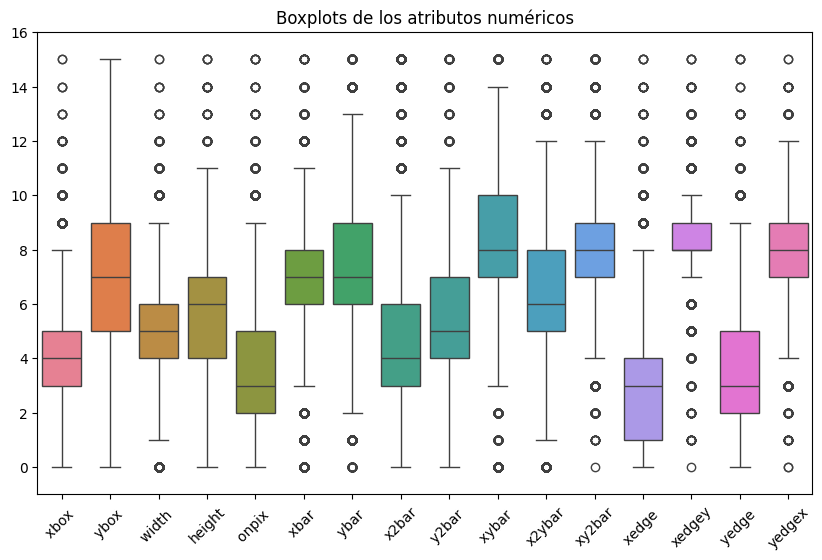

In [ ]:
# Boxplots para ver la dispersión
# Agrupar todos en un solo gráfico para comparar:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[atributos_numericos])
plt.title("Boxplots de los atributos numéricos")
plt.xticks(rotation=45)
plt.ylim(df[atributos_numericos].min().min() - 1, df[atributos_numericos].max().max() + 1)
plt.show()

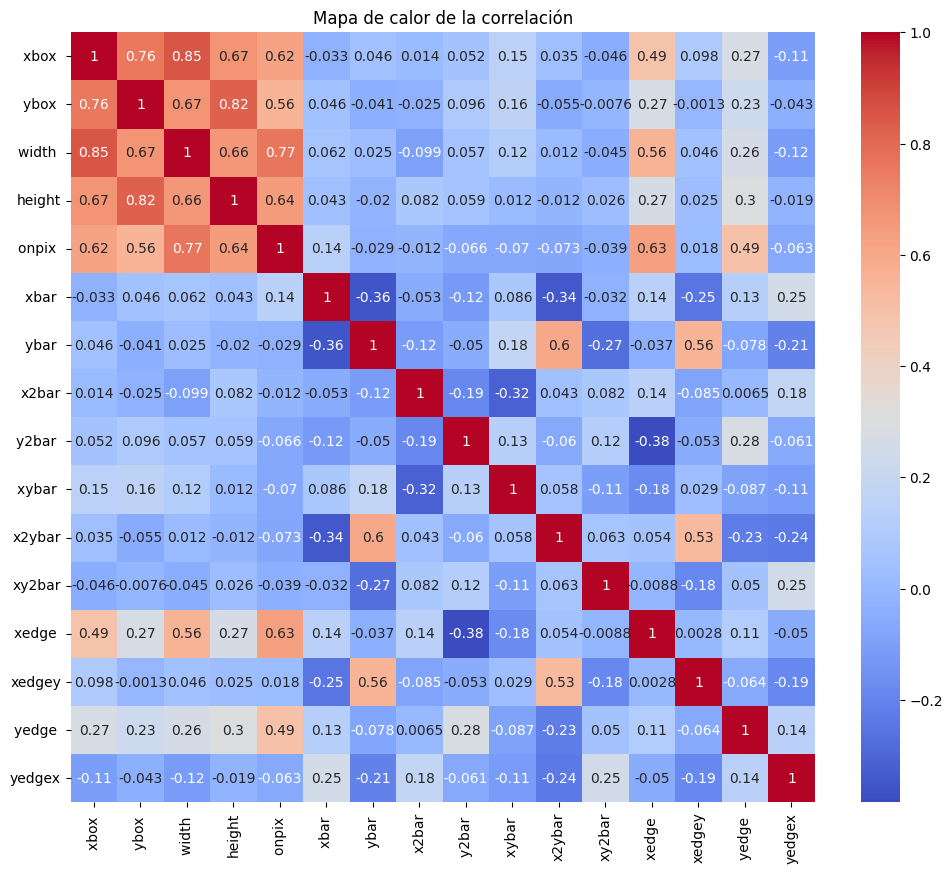

In [ ]:
# Correlación de los atributos
plt.figure(figsize=(12, 10))
corr_matrix = df.drop(columns='letter').corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Mapa de calor de la correlación")
plt.show()

En un par de párrafos haga un resumen de los principales hallazagos encontrados:    

### Interpretación del análisis exploratorio de datos:

El conjunto de datos consta de **20,000 instancias** y **16 atributos** relacionados con características de imágenes que representan letras del alfabeto. Los atributos incluyen variables como 'xbox' (posición horizontal del cuadro), 'ybox' (posición vertical del cuadro), 'width' (ancho del cuadro), 'height' (alto del cuadro), 'onpix' (número de píxeles activos), 'xbar' (media de la coordenada x de los píxeles activos), 'ybar' (media de la coordenada y de los píxeles activos), 'x2bar' (varianza de la media de x), 'y2bar' (varianza de la media de y), entre otros. Los tipos de datos son **object** para la variable 'letter' e **int64** para los atributos de entrada.

Las estadísticas descriptivas de la variable objetivo **'letter'** muestran que hay **26 clases** posibles, correspondientes a las letras mayúsculas del alfabeto inglés. La clase con mayor número de instancias es **'U'** con **813** observaciones, mientras que la clase con menos instancias es **'Z'** con **734**. No se encontraron **valores nulos** en el conjunto de datos. El análisis estadístico de los atributos muestra que las medias oscilan principalmente entre 3.0 y 8.3, con desviaciones estándar de hasta 3.3. Los valores mínimos son 0 en todas las columnas, mientras que los máximos llegan a 15, indicando un rango uniforme para todas las variables. Los rangos intercuartílicos (25% a 75%) se ubican, en la mayoría, entre 3 y 9, sugiriendo cierta dispersión moderada de datos en el conjunto.

En el **gráfico de barra (distribución de la variable 'letter')**, podemos notar que todas las clases se encuentran entre 700 y 800 instancias, lo que indica que no existe un desbalance significativo en los datos. Los **histogramas** muestran distribuciones sesgadas, lo que podría indicar la necesidad de aplicar técnicas de normalización o estandarización en el preprocesamiento. Los **boxplots** confirmaron la presencia de valores atípicos. El **mapa de calor** (correlación entre los atributos) reveló que varios atributos numéricos están altamente correlacionados entre sí, como el **'xbox'**, **'ybox'**, **'onpix'** y **'xbar'**.

## Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Dividir el DataFrame en características (features) y variable objetivo (target)
X = df.drop(['letter'],axis=1).values
y = df['letter'].values

# Codificación de la variable objetivo (y) utilizando LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

## División del dataset en datos de entrenamiento y datos de test

In [ ]:
#Código que realice la división en entrenamiento y test, de acuerdo con la estretgia de evaluación planeada. Describa cuál es.
# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y_encoded,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y_encoded)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Propuesta de arquitectura de red neuronal

Describe:

+ las neuronas en la capa de entrada
+ las capas intermedias – al menos dos –
+ capa de salida
+ funciones de activación

Al menos utiliza relu en algunas de las capas intermedias y utiliza softmax en la capa de salida.

In [ ]:
# Código de la estructuración de la red
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Construir el modelo
modelo = Sequential()
modelo.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
modelo.add(Dropout(0.2))  # Regularización para evitar sobreajuste
modelo.add(Dense(32, activation='relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(26, activation='softmax'))

# Compilar modelo
modelo.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#Código de la inspección del modelo de red
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 26)                  │             858 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,026 (15.73 KB)

 Trainable params: 4,026 (15.73 KB)

 Non-trainable params: 0 (0.00 B)

**Preprocesamiento del dataset y transformaciones previas necesarias para la modelación:**

Se separaron las características de la variable objetivo. Se utilizó **LabelEncoder** para convertir la variable objetivo categórica ('letter') en valores numéricos, facilitando así el entrenamiento de los modelos.

**División del dataset en datos de entrenamiento y datos de test:**
- La división en conjuntos de entrenamiento y prueba (80%-20%) permitió validar el modelo en datos no vistos, asegurando que el modelo tenga una capacidad real de generalización.
- Se aplicó **StandardScaler** para normalizar los datos, asegurando que todas las características tengan media cero y varianza uno, lo cual mejora la convergencia durante el entrenamiento de la red neuronal.

**Propuesta de arquitectura de red neuronal:**
- La red neuronal propuesta tiene una **capa de entrada** con 16 neuronas, correspondiente al número de características en el conjunto de datos.
- Las **capas intermedias** consisten en dos capas densas con 64 y 32 neuronas respectivamente, ambas utilizando la función de activación **ReLU** para introducir no linealidad. Además, se incorporaron capas de **Dropout** con una tasa del 20% entre las capas densas para regularizar el modelo y evitar el sobreajuste.
- La **capa de salida** tiene 26 neuronas, una para cada letra del alfabeto, y utiliza **Softmax** como función de activación para obtener una probabilidad de pertenencia a cada clase.
- El modelo se compiló utilizando el optimizador **Adam** y la función de pérdida **sparse_categorical_crossentropy**, adecuada para problemas de clasificación multiclase con etiquetas enteras. La configuración de parámetros del modelo, como se muestra en el resumen, incluye un total de **4,026 parámetros entrenables**, lo que es una cantidad razonable para un modelo de este tamaño.

##  Ajuste de modelo de Clasificación RNA

Mediante Python y utilizando al menos Keras sobre TensorFlow 2.0 (tensorflow.keras), entrena el modelo o modelos de red neuronal escogidos.

In [ ]:
# Código de ajuste y entrenamiento
history = modelo.fit(X_train_scaled, y_train, batch_size=64, epochs=100, verbose=1, validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1385 - loss: 3.0427 - val_accuracy: 0.5334 - val_loss: 1.8047
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4297 - loss: 1.8577 - val_accuracy: 0.6716 - val_loss: 1.2237
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5436 - loss: 1.4603 - val_accuracy: 0.7281 - val_loss: 1.0351
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5932 - loss: 1.3025 - val_accuracy: 0.7478 - val_loss: 0.9311
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6287 - loss: 1.1927 - val_accuracy: 0.7628 - val_loss: 0.8620
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6453 - loss: 1.1297 - val_accuracy: 0.7725 - val_loss: 0.8133
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6690 - loss: 1.0550 - val_accuracy: 0.7797 - val_loss: 0.7753
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6815 - loss: 1.0157 - val_accu

## Evaluación de modelo RNA

Defina las estadísticas (métricas) de evaluación, y dividiendo el dataset en datos de entrenamiento, validación y datos de test prueba tu propuesta.


In [ ]:
# Evaluar en el conjunto de prueba
red_evaluada = modelo.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Loss: {red_evaluada[0]}, Accuracy: {red_evaluada[1]}")

Loss: 0.3117794096469879, Accuracy: 0.9075000286102295


### Visualice el progreso de entrenamiento del modelo y muestre las estadísticas de evaluación para los conjuntos de entrenamiento y validación.  

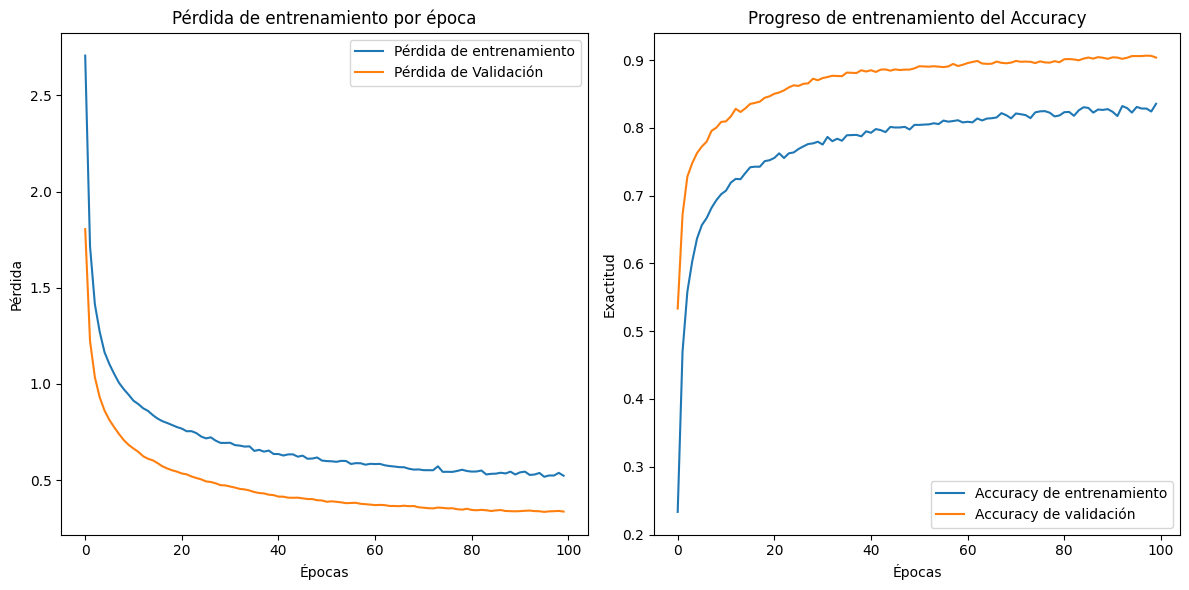

In [ ]:
#Código de evaluación de la red propuesta (entrenamiento y validación)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title("Pérdida de entrenamiento por época")
plt.xlabel("Épocas")
plt.ylabel("Pérdida")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Accuracy de validación')
plt.title("Progreso de entrenamiento del Accuracy")
plt.xlabel("Épocas")
plt.ylabel("Exactitud")
plt.legend()

plt.tight_layout()
plt.show()

### Interpretación de los resultados mostrados en las dos gráficas:

**Pérdida de entrenamiento por época**  
- **Comportamiento:**
  - La pérdida de entrenamiento y la de validación muestran una tendencia descendente muy marcada en las primeras épocas, y luego continúan bajando de forma más gradual conforme aumenta el número de épocas.
  - La curva de validación se mantiene generalmente por debajo de la de entrenamiento, estabilizándose por debajo de 0.5 antes de llegar a la época 100.

- **Interpretación:**
  - Una pérdida menor indica que el modelo muestra mejor rendimiento.  
  - La cercanía entre ambas curvas (y la ausencia de una brecha grande) sugiere que no se está presentando un sobreajuste significativo; por el contrario, el modelo parece generalizar razonablemente bien.  
  - El hecho de que se vea un descenso continuo, incluso si es cada vez más lento, indica que el modelo sigue ajustando sus parámetros, pero es probable que los beneficios de entrenar muchas épocas adicionales sean marginales.

**Progreso de entrenamiento del Accuracy:**  
- **Comportamiento:**
  - La exactitud de entrenamiento comienza en un valor bajo (cerca de 0.2) y aumenta rápidamente en las primeras 20 épocas, para luego subir de forma más suave y estabilizarse alrededor de 0.75 a 0.85.
  - La exactitud de validación inicia en alrededor de 0.4 y sube aún más rápido, llegando cerca de 0.9 y manteniéndose en ese nivel sin grandes fluctuaciones.

- **Interpretación:**
  - Un valor de exactitud cercano a 0.9 (o 90%) en el conjunto de validación es un excelente indicador de que el modelo logra predecir correctamente la mayoría de los casos en datos que no ha visto durante el entrenamiento.  
  - Que la curva de validación esté por encima de la de entrenamiento puede ocurrir en escenarios donde la regularización hace más “difícil” el entrenamiento, o si el conjunto de validación resulta ligeramente más sencillo que el de entrenamiento. De cualquier manera, no es necesariamente un problema.  
  - La estabilización de las curvas sugiere que se ha alcanzado un punto en el que seguir entrenando (más allá de 60 a 80 épocas) aporta mejoras muy leves en cuanto a exactitud.



### Evalúe los resultados  para el conjunto de test.

In [ ]:
#Código de evaluación de la red propuesta (evaluación conjunto de test)

# Obtiene probabilidades de cada clase (forma: [num_muestras, 26])
y_probs = modelo.predict(X_test_scaled)

# Toma la clase con mayor probabilidad (argmax) en el eje 1
y_pred = np.argmax(y_probs, axis=1)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
# Reporte de clasificación
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

           A       0.97      0.93      0.95       158
           B       0.80      0.90      0.85       153
           C       0.89      0.97      0.93       147
           D       0.93      0.93      0.93       161
           E       0.86      0.88      0.87       154
           F       0.90      0.87      0.89       155
           G       0.89      0.87      0.88       155
           H       0.89      0.75      0.81       147
           I       0.92      0.87      0.89       151
           J       0.94      0.91      0.93       149
           K       0.88      0.90      0.89       148
           L       0.95      0.91      0.93       152
           M       0.97      0.94      0.96       158
           N       0.96      0.90      0.93       157
           O       0.87      0.95      0.90       150
           P       0.95      0.89      0.92       161
           Q       0.94      0.95      0.95       157
           R       0.81    

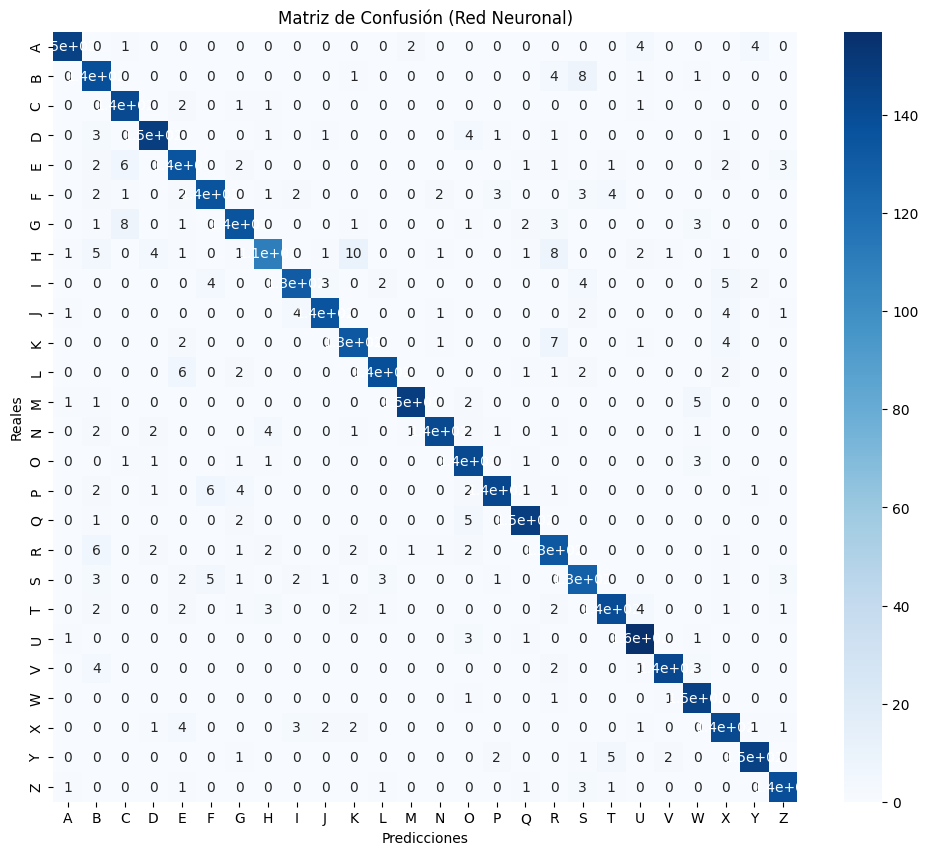

In [ ]:
# Matriz de Confusión de la Red Neuronal
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 10))
sns.heatmap(cm,
            annot=True,
            cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicciones")
plt.ylabel("Reales")
plt.title("Matriz de Confusión (Red Neuronal)")
plt.show()

### Interpretación de los resultados:

El modelo fue evaluado en el conjunto de prueba, utilizando las probabilidades predichas por la red neuronal y la toma de la clase con la mayor probabilidad mediante argmax. El **reporte de clasificación** muestra que el modelo tiene un desempeño sólido con una **precisión general de 91%**, lo que indica que el modelo clasifica correctamente la mayoría de las letras del alfabeto. Se observan variaciones entre las letras, con algunas alcanzando muy alta precisión, como la letra **'A'** con una precisión de 97%, y otras con una precisión más baja, como la letra **'B'**, que tiene una precisión de 80%. Sin embargo, incluso las letras con menor precisión siguen manteniendo un rendimiento adecuado.

El **F1-Score** promedio ponderado (weighted avg) es de 0.91, lo que sugiere que el modelo tiene un buen equilibrio entre precisión y recuperación a través de todas las clases, lo cual es crucial en problemas multiclase.

La **matriz de confusión** muestra una representación visual clara de las predicciones correctas e incorrectas para cada letra. El modelo presenta un **alto nivel de exactitud**, ya que la diagonal principal está dominada por valores altos, lo que indica que la mayoría de las predicciones fueron correctas. Además, algunas letras tienen más confusión entre clases cercanas, lo que es esperado en modelos de clasificación multiclase donde algunas clases pueden ser más difíciles de distinguir.

## Ajuste de modelos de clasificación alternativos

Elige al menos un método de clasificación no basado en redes neuronales (p.ej. regresión logística, árboles de decisión, reglas de clasificación, random forest, SVM, etc).

In [ ]:
#Código de ajuste del modelo 1
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=1000)
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)

In [ ]:
#Código de ajuste del modelo 2
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)  # RandomForest no necesita el escalado
y_pred_rfc = rfc.predict(X_test)

In [ ]:
#Código para mostrar la evaluación de los modelos

# Reporte de clasificación
print("Regresión Logística:")
print(classification_report(y_test, y_pred_logreg, target_names=label_encoder.classes_))
print("Random Forest Classifier:")
print(classification_report(y_test, y_pred_rfc, target_names=label_encoder.classes_))

Regresión Logística:
              precision    recall  f1-score   support

           A       0.90      0.90      0.90       158
           B       0.67      0.74      0.70       153
           C       0.87      0.83      0.85       147
           D       0.77      0.80      0.79       161
           E       0.69      0.81      0.74       154
           F       0.74      0.77      0.75       155
           G       0.70      0.57      0.63       155
           H       0.58      0.50      0.54       147
           I       0.86      0.78      0.82       151
           J       0.84      0.83      0.84       149
           K       0.75      0.70      0.72       148
           L       0.80      0.82      0.81       152
           M       0.91      0.89      0.90       158
           N       0.84      0.83      0.84       157
           O       0.62      0.64      0.63       150
           P       0.85      0.81      0.83       161
           Q       0.72      0.74      0.73       157
      

Construya un o dos párrafos con los principales hallazgos. Incluye una explicación de los parámetros que consideres relevantes en cada ejecución.

### Interpretación del ajuste de Modelos de clasificación Alternativos:

En el análisis de los resultados obtenidos de los modelos de **Regresión Logística** y **Random Forest Classifier**, se destacan diferencias clave en el rendimiento de ambos.

La **regresión logística** obtuvo una precisión general de **77%**. Este modelo mostró una **buena precisión** en algunas clases (por ejemplo, la letra 'A' con un 90%), pero también tuvo dificultades con otras clases como 'B' (precisión de 67%) y 'S' (precisión de 50%). El F1-Score promedio ponderado (weighted avg) de **0.77** refleja este desempeño desigual en todas las clases, con un equilibrio entre precisión y recall, aunque hay margen de mejora en algunas clases.

Por otro lado, el modelo de **Random Forest Classifier**, superó claramente a **Regresión Logística**, debido a que mostró un mejor rendimiento, con una precisión general de **97%**. Este modelo logró un excelente desempeño en casi todas las clases, con una **precisión superior al 90%** en casi todas las letras, y destacándose en clases como 'L' y 'Z' con un 100% de precisión. La métrica de F1-Score ponderado alcanzó **0.97**, lo que indica un equilibrio excelente entre precisión y recall a través de todas las clases.

## Comparación del desempeño de modelos

Muestra los resultados obtenidos por los diferentes algoritmos escogidos de forma gráfica y comparada/superpuesta.

In [ ]:
#Código para mostrar la comparación de métricas de desempeño de las dos propuestas en tabla
from sklearn.metrics import accuracy_score
test_acc = red_evaluada[1]
acc_logreg = accuracy_score(y_test, y_pred_logreg)
acc_rfc = accuracy_score(y_test, y_pred_rfc)

resultados = {
    'Modelo': ['Red Neuronal','Logistic Regression', 'Random Forest Classifier'],
    'Exactitud': [test_acc, acc_logreg, acc_rfc]
}
df_resultados = pd.DataFrame(resultados)
df_resultados

,Modelo,Exactitud
0,Red Neuronal,0.9075
1,Logistic Regression,0.7745
2,Random Forest Classifier,0.9675


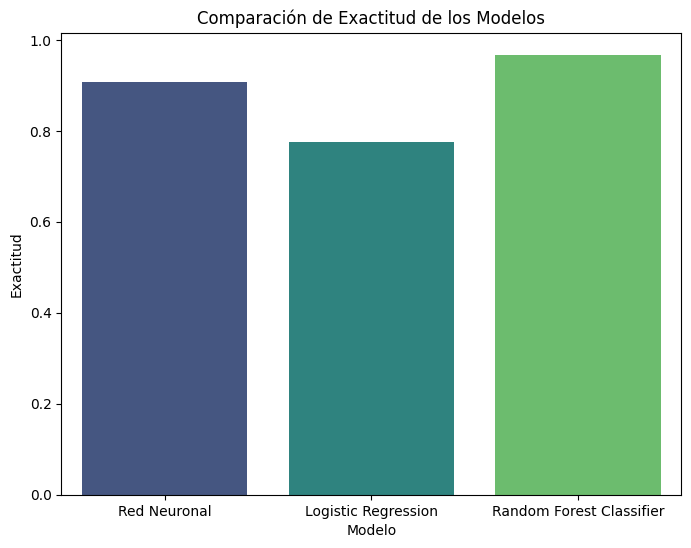

In [ ]:
# Comparación de métricas del desempeño de los modelos
plt.figure(figsize=(8, 6))
sns.barplot(data=df_resultados, x='Modelo', y='Exactitud', palette='viridis')

# Añadir título y etiquetas
plt.title("Comparación de Exactitud de los Modelos")
plt.xlabel("Modelo")
plt.ylabel("Exactitud")

# Mostrar el gráfico
plt.show()

Construya un párrafo con los principales hallazgos.

### Principales Hallazgos
- **Red Neuronal** tiene una **exactitud de 90.75%**, lo que refleja un buen rendimiento en la clasificación de letras, pero su desempeño es inferior al de **Random Forest** en términos de precisión general.
- **Regresión Logística** mostró una **exactitud de 77.45%**, lo que indica que no logra capturar las complejidades del problema y presenta un rendimiento significativamente más bajo en comparación con los otros modelos.
- **Random Forest** obtiene el mejor desempeño con una **exactitud de 96.75%**, demostrando su capacidad superior para modelar relaciones complejas y no lineales entre las clases, siendo el modelo más preciso en este análisis.

## Discusión de los resultados obtenidos y argumentos sobre cómo se podrían mejorar de dichos resultados

Realice en este espacio todo el análsis de resultados final incluyendo:
+ Resultados comparados. Conclusiones objetivas y significantes con base a las diferentes métricas escogidas.
+ Argumentos que describan con qué técnica se obtienen mejores resultados en base a las diferentes métricas que hayas escogido
+ Explicación de cómo se podrían mejorar los resultados obtenidos por las redes neuronales, independientemente de que mejoren o no a los algoritmos no basados en redes neuronales.

### Resultados comparados. Conclusiones objetivas y significantes con base en las diferentes métricas escogidas:

La **Red Neuronal** presentó un rendimiento decente, sin embargo, no logró superar al modelo Random Forest classifier en términos de exactitud. El modelo de **Regresión Logística** obtuvo un rendimiendo mucho más bajo, lo que refleja sus limitaciones al tratar de capturar relaciones complejas en los datos. En contraste, el modelo de **Random Forest Classifier** alcanzó una mejor capacidad para manejar las interacciones no lineales y aprender características complejas de los datos, lo que lo convierte en el modelo más eficaz en términos de exactitud y generalización.

### Argumentos que describen con qué técnica se obtienen mejores resultados en base a las diferentes métricas elegidas:
En cuanto a las métricas adicionales, los resultados de los modelos son los siguientes:
- **Red Neuronal**: Alcanzó una **exactitud de 90.75%**. Su capacidad para aprender patrones complejos no fue suficiente para igualar el rendimiento de Random Forest Classifier, aunque su desempeño sigue siendo competitivo, especialmente considerando que el modelo tiene la capacidad de generalizar a nuevos datos.
- **Regresión Logística**: Su **exactitud del 77.45%** es un reflejo claro de su dificultad para manejar datos con relaciones no lineales o interacciones complejas. La baja **precisión** en algunas clases demuestra la incapacidad de este modelo para abordar de manera efectiva los desafíos de clasificación multiclase.
- **Random Forest Classifier**: Fue el más eficiente con una **exactitud de 96.75%**, lo que también se refleja en las métricas de **precisión**, **recall** y **F1-score**. Este modelo demostró que maneja muy bien las relaciones no lineales, lo que lo convierte en la técnica de clasificación más adecuada para este conjunto de datos.

### Para mejorar el rendimiento de una red neuronal, se pueden aplicar las siguientes estrategias:
- **Optimización de Hiperparámetros**: El ajuste adecuado de parámetros clave como la tasa de aprendizaje, el número de épocas y el tamaño de los lotes es esencial para mejorar el desempeño. Técnicas como **GridSearch** o **RandomizedSearchCV** pueden ayudar a encontrar la combinación óptima de estos parámetros para reducir el error de predicción y mejorar la generalización.
- **Aumentar la complejidad del modelo**: Incrementar el número de capas ocultas o neuronas en cada capa puede permitir a la red neuronal captar patrones más complejos en los datos. Este ajuste puede ser especialmente útil cuando se enfrentan datos con relaciones no lineales que no pueden ser fácilmente capturadas por modelos más simples.
- **Validación cruzada**: Implementar esta estrategia durante el entrenamiento permite evaluar de manera más precisa la capacidad de generalización del modelo. Esto ayuda a identificar si el modelo se sobreajusta a los datos de entrenamiento o si es capaz de generalizar bien a nuevos datos, mejorando así la confiabilidad de las métricas obtenidas.